In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from pathlib import Path
from tkinter import filedialog
import seaborn as sns

from datetime import date
import tifffile
from scipy import stats

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2022-01-13


'2022-01-13'

In [3]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)
path

WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data')

In [4]:
parents = [x for x in path.iterdir() if x.is_dir()]
parents

[WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-15_dualcolor_lowbindigtips'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-17_dualcolor_wt_r303x'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-18_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-22_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-25_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-29_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-30_dualcolor_freshtaxol'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-12-02_dualcolor_freshtaxol')]

In [5]:
folders = []
for j in parents:
    folders0 = [x for x in j.iterdir() if x.is_dir()]
    folders0 = [i for i in folders0 if (str(i)[-3:] == 'yes') == True]
    folders =  folders + folders0

folders

[WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-15_dualcolor_lowbindigtips/CH2_DCXGFP1.5nM_typeWT_DCXRFP8.5nM-yes'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-15_dualcolor_lowbindigtips/CH4_DCXGFP1.0nM_typeR303X_DCXRFP7.0nM-yes'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-15_dualcolor_lowbindigtips/CH5_DCXGFP1.0nM_typeR303X_DCXRFP7.0nM-yes'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-15_dualcolor_lowbindigtips/CH8_DCXGFP1.0nM_typeR303X_DCXRFP7.0nM-yes'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-17_dualcolor_wt_r303x/CH1_DCXGFP0.5nM_typeWT_DCXRFP8.5nM-yes'),
 WindowsPath('C:/Users/clair/OneDrive - McGill University/DCX/DualColor/Sofia Data/2021-11-17_dualcolor_wt_r303x/CH3_DCXGFP0.5nM_typeWT_DCXRFP9.5nM_freshtaxol-yes'),
 WindowsPath('C:/Users/clair/O

In [6]:
file_paths = []
mask_paths = []
for folder in folders:
    results_path = folder / 'results-16-bit'
    list_of_stacks = [stack for stack in results_path.iterdir() 
                      if stack.match('*Masked-Composite*')]
    list_of_masks = [mask for mask in results_path.iterdir() if mask.match('*Masked-Binary-Composite*')]
    
    file_paths = file_paths + list_of_stacks
    mask_paths = mask_paths + list_of_masks
    
    

In [7]:
#This is used to keep all pixels that are in the microtubule, ignoring all non-MT pixels

ch = []
conc_DCXRFP = []
conc_DCXGFP = []
DCX_type = []
dates = []
corrcoeff = []
pvals = []
numb_of_pixels = []


for n,i in enumerate(file_paths):
    #get the file metadata
    CHloc = str(i).find('CH')
    DCXRFPloc = str(i).rfind('RFP')
    DCXGFPloc = str(i).rfind('GFP')
    dcxtype = str(i).find('type')
    ch = ch + [str(i)[CHloc+2:CHloc+3]]
    conc_DCXRFP = conc_DCXRFP + [(str(i)[DCXRFPloc+3:DCXRFPloc+6])]
    conc_DCXGFP = conc_DCXGFP + [(str(i)[DCXGFPloc+3:DCXGFPloc+6])]
    DCX_type = DCX_type + [(str(i)[dcxtype+4:DCXRFPloc-4])]
    
    dateloc = str(i).find("202")
    dates = dates + [str(i)[dateloc : dateloc+10]]

    conc_DCXGFP =  [float(i) for i in conc_DCXGFP]
    conc_DCXRFP =  [float(i) for i in conc_DCXRFP]
    
    #get the correlation coefficient of the red and green channels
    im = tifffile.imread(str(i))
    g, r, b = im #separate the stack into the three colors (red green blue)

    #determine which pixels to keep based on the binary MT image
    mask = tifffile.imread(str(mask_paths[n]))[2] !=0
    pixels_to_keep = mask.flatten()
    
    g_flat = g.flatten()
    r_flat = r.flatten()
    
    g_pixels = g_flat[pixels_to_keep]
    r_pixels = r_flat[pixels_to_keep]
    
    
    coeff, pval = stats.pearsonr(g_pixels, r_pixels)
    
    
    corrcoeff.append(coeff)
    pvals.append(pval)
    numb_of_pixels.append(len(r_pixels))    


In [ ]:
dcxgfp_conc = '[GFP-DCX](nM)'
dcxrfp_conc = '[RFP-DCX](nM)'
corr_gfp = 'GFPxRFP Correlation %'
area_rfp = 'RFP Area %'
Type = 'Type'

df = pd.DataFrame({'Date': dates,'CH': ch,'Type': DCX_type,
                   dcxgfp_conc: conc_DCXGFP,
                   dcxrfp_conc: conc_DCXRFP,
                      'Pearson Coeff': corrcoeff,
                      'Pvalue': pvals,
                      'number of pixels': numb_of_pixels})


df.to_csv(Path.cwd() / f'Pearson Correlation data{date_today} ignoring non-MT pixels-using ALL DATA.csv')


In [8]:
df_cleaned = df[df['[GFP-DCX](nM)']==0.5]
df_cleaned.head()

summary = df_cleaned.groupby(['Type', 'Date', 'CH',  '[RFP-DCX](nM)']).agg(['mean', 'std', 'count'])
summary
summary.to_csv(Path.cwd() / f'Summary by channel{date_today} ignoring non-MT pixels-using ALL DATA--only0pt5gfpdcx.csv')

In [9]:
summary

[GFP-DCX](nM)            Pearson Coeff  \
                                           mean  std count          mean   
Type  Date       CH [RFP-DCX](nM)                                          
R303X 2021-11-17 4  9.5                     0.5  0.0     5      0.366408   
      2021-11-18 1  9.5                     0.5  0.0     7      0.552460   
                 2  8.5                     0.5  0.0     7      0.430186   
      2021-11-22 5  6.5                     0.5  0.0     6      0.566504   
      2021-11-25 2  4.5                     0.5  0.0     3      0.527180   
                 4  2.5                     0.5  0.0     7      0.462887   
      2021-11-29 2  2.5                     0.5  0.0     7      0.492215   
                 4  6.5                     0.5  0.0     6      0.510697   
                 6  9.5                     0.5  0.0     5      0.490304   
      2021-11-30 2  6.5                     0.5  0.0     6      0.635361   
                 5  2.5                     0.5  0.0     6      0.370717   
                 6  9.5                     0.5  0.0     6      0.525478   
WT    2021-11-17 1  8.5                     0.5  0.0     5      0.600626   
                 3  9.5                     0.5  0.0     5      0.578974   
      2021-11-18 4  8.5                     0.5  0.0     7      0.646547   
      2021-11-22 4  6.5                     0.5  0.0     8      0.474076   
      2021-11-25 1  4.5                     0.5  0.0     6      0.573165   
                 3  2.5                     0.5  0.0     7      0.622550   
      2021-11-29 3  2.5                     0.5  0.0     5      0.550145   
                 5  6.5                     0.5  0.0     6      0.635446   
      2021-11-30 1  6.5                     0.5  0.0     6      0.648749   
                 3  9.5                     0.5  0.0     6      0.585906   
                 4  2.5                     0.5  0.0     6      0.573096   
      2021-12-02 1  9.5                     0.5  0.0     7      0.671727   

                                                          Pvalue  \
                                        std count           mean   
Type  Date       CH [RFP-DCX](nM)                                  
R303X 2021-11-17 4  9.5            0.064734     5  8.634877e-151   
      2021-11-18 1  9.5            0.060557     7   0.000000e+00   
                 2  8.5            0.112126     7  1.091220e-131   
      2021-11-22 5  6.5            0.139097     6   0.000000e+00   
      2021-11-25 2  4.5            0.084739     3   0.000000e+00   
                 4  2.5            0.054873     7   0.000000e+00   
      2021-11-29 2  2.5            0.075271     7  4.236794e-308   
                 4  6.5            0.070979     6   0.000000e+00   
                 6  9.5            0.040698     5   0.000000e+00   
      2021-11-30 2  6.5            0.037583     6   0.000000e+00   
                 5  2.5            0.195802     6   1.733190e-09   
                 6  9.5            0.066670     6   0.000000e+00   
WT    2021-11-17 1  8.5            0.074123     5   0.000000e+00   
                 3  9.5            0.077428     5  6.899819e-250   
      2021-11-18 4  8.5            0.111120     7   0.000000e+00   
      2021-11-22 4  6.5            0.120342     8  3.625775e-190   
      2021-11-25 1  4.5            0.140350     6  2.068972e-246   
                 3  2.5            0.079701     7   0.000000e+00   
      2021-11-29 3  2.5            0.230010     5  6.720250e-254   
                 5  6.5            0.069310     6   0.000000e+00   
      2021-11-30 1  6.5            0.075071     6   0.000000e+00   
                 3  9.5            0.145060     6   0.000000e+00   
                 4  2.5            0.159178     6  4.900263e-253   
      2021-12-02 1  9.5            0.124652     7   0.000000e+00   

                                                       number of pixels  \
                                             std count             me

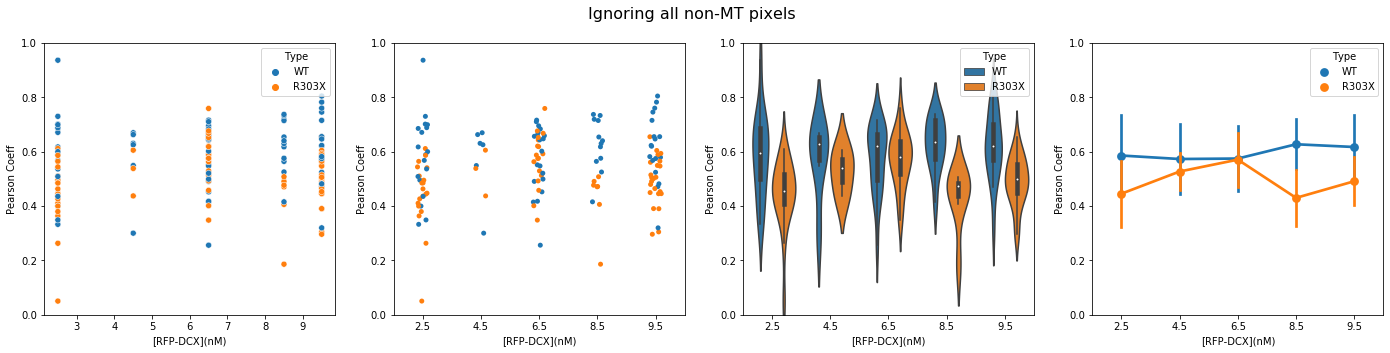

In [10]:
fig, ax = plt.subplots(1,4, figsize = (24,5))

sns.scatterplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[0])

sns.stripplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[1])
ax[1].legend([],[], frameon=False)

sns.violinplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[2])

sns.pointplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[3], ci = 'sd')

fig.suptitle('Ignoring all non-MT pixels', fontsize=16)


for i in ax:
    i.set(ylim = (0,1))

fig.savefig(Path.cwd() / f'{date_today} plots from data ignoring all non-MT pixels--only0pt5gfpdcx - fixed yaxis.png')

In [11]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
palette = [cyan,green]

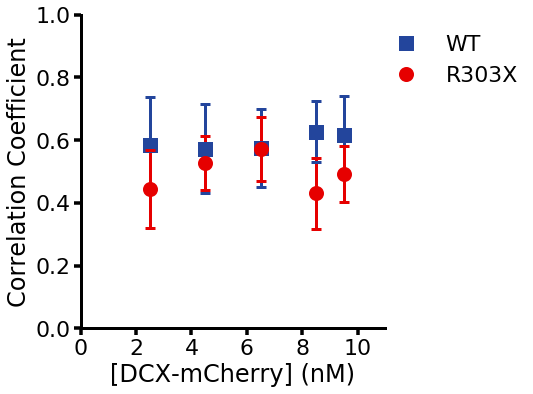

In [14]:
colors = [blue, red]
shapes = ['s', 'o']
fillcolor = [blue, red]

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

fig, ax = plt.subplots(1,1, figsize = (9.5,6), frameon = False)

for n,mutant in enumerate(df_cleaned.Type.unique()):
    data = df_cleaned[df_cleaned['Type']==mutant]
    
    means = data.groupby('[RFP-DCX](nM)').mean().reset_index()['Pearson Coeff']
    stdev = data.groupby('[RFP-DCX](nM)').std().reset_index()['Pearson Coeff']
    x = np.sort(data['[RFP-DCX](nM)'].unique())
    
    ax.plot(x, means, shapes[n], label = mutant, color = colors[n], mew = 3, mfc = fillcolor[n])
    ax.errorbar(x = x, y = means, yerr = stdev, fmt = ' ', color = colors[n], label = None, capsize = 5, capthick = 3, alpha = 1)
    
ax.set(xlim = (0,11), ylim = (0,1))
ax.set_xlabel(xlabel = '[DCX-mCherry] (nM)', fontsize = 24)
ax.set_ylabel(ylabel = 'Correlation Coefficient', fontsize = 24)
ax.legend(frameon = False, bbox_to_anchor=(1.5, 1))


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.xaxis.set_ticks(np.arange(0, 12, 2))


plt.tight_layout()
fig.savefig(Path.cwd() / f'{date_today} Correlation Coefficient vs DCX-mCherry Concentration.pdf', transparent = True)


summarytable = df.groupby(['Type', '[RFP-DCX](nM)']).agg(['mean', 'std'])
summarytable.to_csv(Path.cwd() / f'{date_today} summary table for plotting.csv')

In [7]:
# #This is used to take into account all pixels that are not zero in both channels (or at least have some intensity in one channel)

# ch = []
# conc_DCXRFP = []
# conc_DCXGFP = []
# DCX_type = []
# dates = []
# corrcoeff = []
# pvals = []
# numb_of_pixels = []


# for i in file_paths:
#     #get the file metadata
#     CHloc = str(i).find('CH')
#     DCXRFPloc = str(i).rfind('RFP')
#     DCXGFPloc = str(i).rfind('GFP')
#     dcxtype = str(i).find('type')
#     ch = ch + [str(i)[CHloc+2:CHloc+3]]
#     conc_DCXRFP = conc_DCXRFP + [(str(i)[DCXRFPloc+3:DCXRFPloc+6])]
#     conc_DCXGFP = conc_DCXGFP + [(str(i)[DCXGFPloc+3:DCXGFPloc+6])]
#     DCX_type = DCX_type + [(str(i)[dcxtype+4:DCXRFPloc-4])]
    
#     dateloc = str(i).find("202")
#     dates = dates + [str(i)[dateloc : dateloc+10]]

#     conc_DCXGFP =  [float(i) for i in conc_DCXGFP]
#     conc_DCXRFP =  [float(i) for i in conc_DCXRFP]
    
#     #get the correlation coefficient of the red and green channels
#     im = tifffile.imread(str(i))
#     g, r, b = im #separate the stack into the three colors (red green blue)

#     g_flat = g.flatten()
#     r_flat = r.flatten() #flatten the images into linear arrays for easier calculations

#     idx = np.where(~((g_flat == 0) & (r_flat == 0)))[0] #find the indices for non zero-zero pixels

#     g_corr = g_flat[idx] #collect the pixels that are not zero in both channels
#     r_corr = r_flat[idx]
    
#     coeff, pval = stats.pearsonr(g_corr, r_corr) #find the correlation coefficient ignoring zero-zero pixels
#     #coeff_zeros, pval_zeros = stats.pearsonr(g_flat, r_flat) #include zero-zero pixels in the correlation calculation
    
#     corrcoeff.append(coeff)
#     pvals.append(pval)
#     numb_of_pixels.append(len(r_corr))
   
    
    

    
    
    
# dcxgfp_conc = '[GFP-DCX](nM)'
# dcxrfp_conc = '[RFP-DCX](nM)'
# corr_gfp = 'GFPxRFP Correlation %'
# area_rfp = 'RFP Area %'
# Type = 'Type'

# df = pd.DataFrame({'Date': dates,'CH': ch,'Type': DCX_type,
#                    dcxgfp_conc: conc_DCXGFP,
#                    dcxrfp_conc: conc_DCXRFP,
#                       'Pearson Coeff': corrcoeff,
#                       'Pvalue': pvals,
#                       'number of pixels': numb_of_pixels})


# df.to_csv(Path.cwd() / f'Pearson Correlation data{date_today} all non zero-zero pixels-using ALL DATA.csv')

# df_cleaned = df[df['[GFP-DCX](nM)']==0.5]
# df_cleaned.head()

# summary = df_cleaned.groupby(['Type', 'Date', 'CH',  '[RFP-DCX](nM)']).agg(['mean', 'std', 'count'])
# summary
# summary.to_csv(Path.cwd() / f'Summary by channel{date_today} all non zero-zero pixels-using ALL DATA--only0pt5gfpdcx.csv')

In [11]:
# fig, ax = plt.subplots(1,4, figsize = (24,5))

# sns.scatterplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[0])

# sns.stripplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[1])
# ax[1].legend([],[], frameon=False)

# sns.violinplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[2])

# sns.pointplot(data = df_cleaned, x = '[RFP-DCX](nM)', y = 'Pearson Coeff', hue = 'Type', ax = ax[3], ci = 'sd')

# for i in ax:
#     i.set(ylim = (0,1))


# fig.suptitle('Ignoring all zero-zero pixels', fontsize=16)

# fig.savefig(Path.cwd() / f'{date_today} plots from data ignoring all zero-zero pixels--only0pt5gfpdcx-fixed yaxis.png')